In [43]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv('hcvdat0.csv', sep=',')


In [45]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Analyse exploratoire des données

In [46]:
df.shape

(615, 14)

In [47]:
df= df.drop('Unnamed: 0', axis=1 )

In [48]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [49]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [50]:
df1=df.copy()

In [51]:
df1.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [52]:
df1.dtypes.value_counts()

float64    10
object      2
int64       1
dtype: int64

<Figure size 1440x720 with 0 Axes>

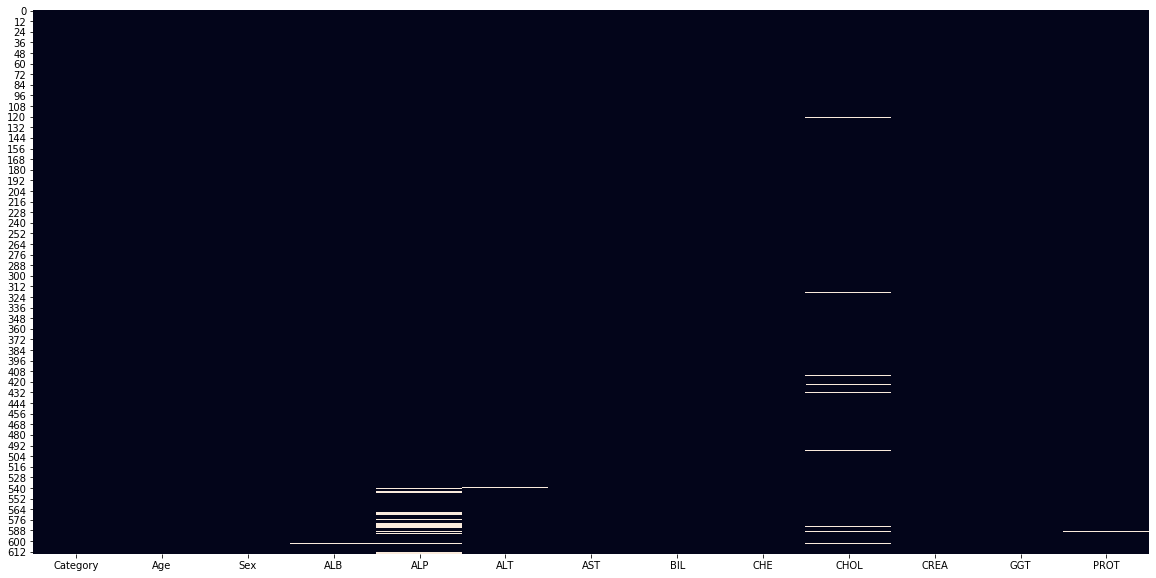

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)

In [54]:
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=False)

ALP         0.029268
CHOL        0.016260
PROT        0.001626
ALT         0.001626
ALB         0.001626
GGT         0.000000
CREA        0.000000
CHE         0.000000
BIL         0.000000
AST         0.000000
Sex         0.000000
Age         0.000000
Category    0.000000
dtype: float64

In [55]:
df1['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

Age


<Figure size 432x288 with 0 Axes>

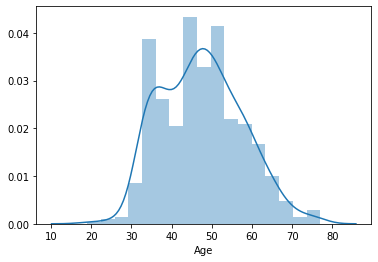

In [56]:
for col in df1.select_dtypes('int64'):
    print(col)
    plt.figure()
    sns.distplot(df1[col])

ALB


<Figure size 432x288 with 0 Axes>

ALP


<Figure size 432x288 with 0 Axes>

ALT


<Figure size 432x288 with 0 Axes>

AST


<Figure size 432x288 with 0 Axes>

BIL


<Figure size 432x288 with 0 Axes>

CHE


<Figure size 432x288 with 0 Axes>

CHOL


<Figure size 432x288 with 0 Axes>

CREA


<Figure size 432x288 with 0 Axes>

GGT


<Figure size 432x288 with 0 Axes>

PROT


<Figure size 432x288 with 0 Axes>

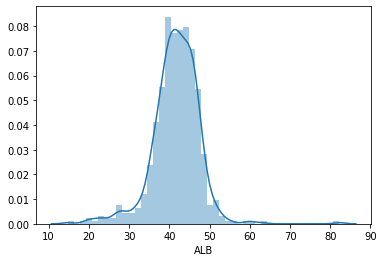

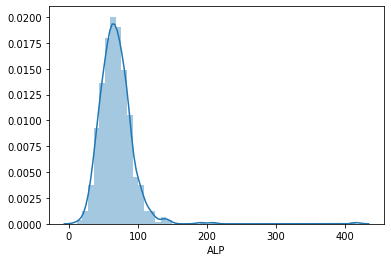

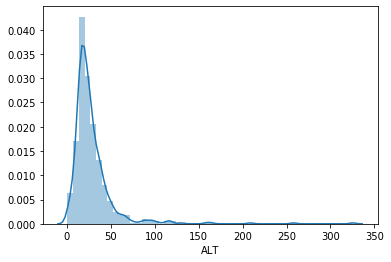

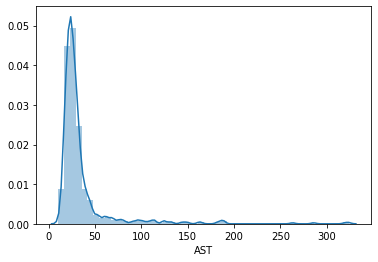

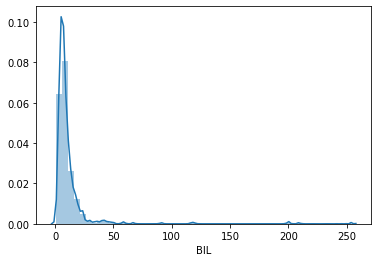

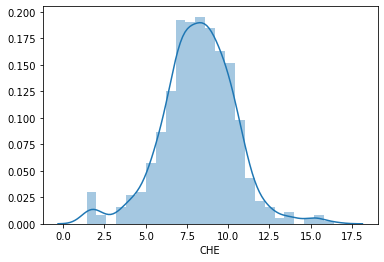

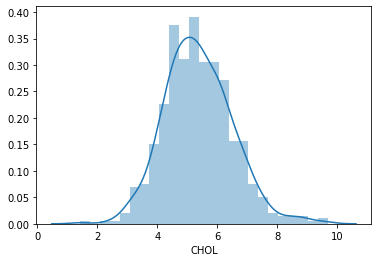

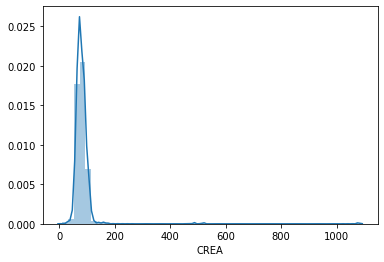

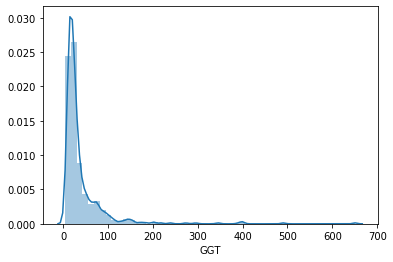

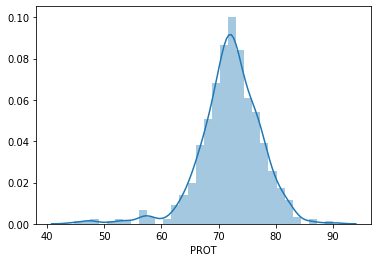

In [57]:
for col in df1.select_dtypes('float64'):
    print(col)
    plt.figure()
    sns.distplot(df1[col])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

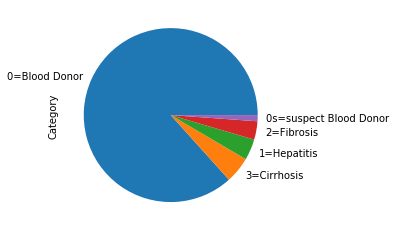

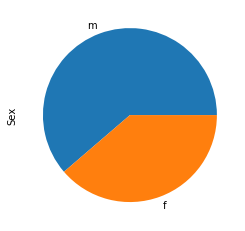

In [58]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

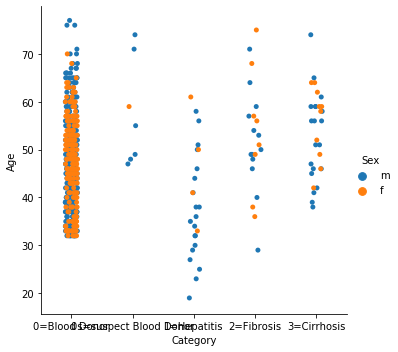

In [59]:
sns.catplot(x='Category' , y='Age', data=df1, hue='Sex')